# LSTM

発展的なRNNの手法を理解する

## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれらすべてを動かした上で、それぞれの役割を説明できる状態を目指します。

## 【問題1】各種手法の実行

Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。



- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

In [1]:
# ライブラリのインポート
from __future__ import print_function
import tensorflow as tf
from keras.preprocessing import sequence
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers import BatchNormalization
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras.datasets import imdb
from keras import backend as K

In [2]:
max_features = 20000
maxlen = 80
batch_size = 32

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


- SimpleRNN

In [5]:
# SRNNのモデル定義
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# コンパイル
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 学習
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 85s 106ms/step - loss: 0.6732 - accuracy: 0.5596 - val_loss: 0.6023 - val_accuracy: 0.6664
Epoch 2/2
782/782 [==============================] - 84s 108ms/step - loss: 0.5398 - accuracy: 0.7264 - val_loss: 0.6189 - val_accuracy: 0.6422


In [8]:
srnn_score, srnn_acc = model.evaluate(x_test,
                            y_test,
                            batch_size=batch_size)
print('SimpleRNNのスコア:', srnn_score)
print('SimpleRNNのacc', srnn_acc)

782/782 [==============================] - 10s 13ms/step - loss: 0.6189 - accuracy: 0.6422
SimpleRNNのスコア: 0.6188861131668091
SimpleRNNのacc 0.6421999931335449


- GRU

In [9]:
# GRUのモデル定義
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# コンパイル
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 学習
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 258s 326ms/step - loss: 0.4424 - accuracy: 0.7872 - val_loss: 0.4110 - val_accuracy: 0.8112
Epoch 2/2
782/782 [==============================] - 256s 327ms/step - loss: 0.2554 - accuracy: 0.8972 - val_loss: 0.3878 - val_accuracy: 0.8406


In [12]:
gru_score, gru_acc = model.evaluate(x_test,
                            y_test,
                            batch_size=batch_size)
print('GRUのスコア:', gru_score)
print('GRUのacc', gru_acc)

782/782 [==============================] - 23s 30ms/step - loss: 0.3878 - accuracy: 0.8406
GRUのスコア: 0.3878153860569
GRUのacc 0.8405600190162659


- LSTM

In [13]:
# LSTMのモデル定義
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# コンパイル
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# 学習
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 248s 312ms/step - loss: 0.4399 - accuracy: 0.7888 - val_loss: 0.3597 - val_accuracy: 0.8400
Epoch 2/2
782/782 [==============================] - 233s 298ms/step - loss: 0.2578 - accuracy: 0.8980 - val_loss: 0.4195 - val_accuracy: 0.8339


In [16]:
lstm_score, lstm_acc = model.evaluate(x_test,
                            y_test,
                            batch_size=batch_size)
print('LSTMのスコア:', lstm_score)
print('LSTMのacc:', lstm_acc)

782/782 [==============================] - 24s 31ms/step - loss: 0.4195 - accuracy: 0.8339
LSTMのスコア: 0.4195360243320465
LSTMのacc: 0.8338800072669983


- ConvLSTM2D

In [17]:
if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")


In [18]:
#形形状（n_frames、width、height、channels）のムービーを入力として受け取り、
#同じ形状のムービーを返すレイヤーを作成します。

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

95/95 [==============================] - 2167s 23s/step - loss: 0.8673 - val_loss: 0.7851


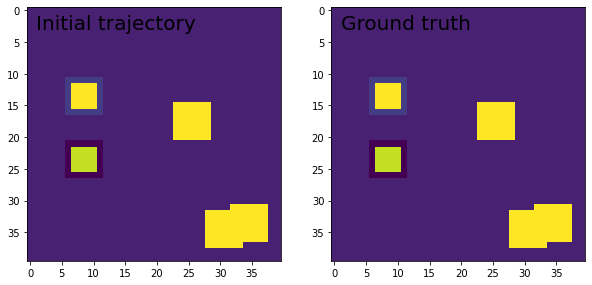

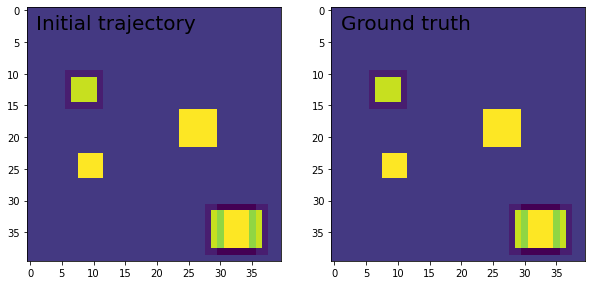

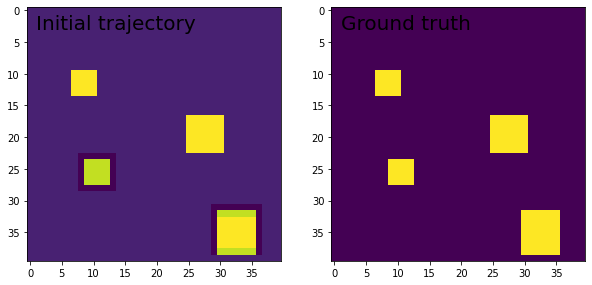

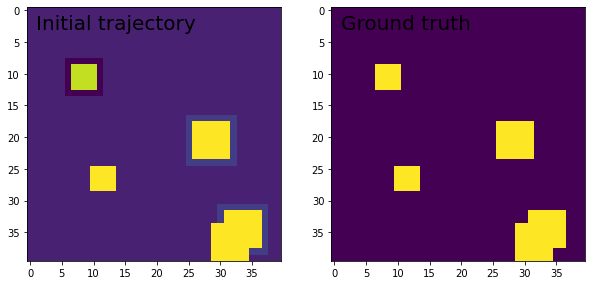

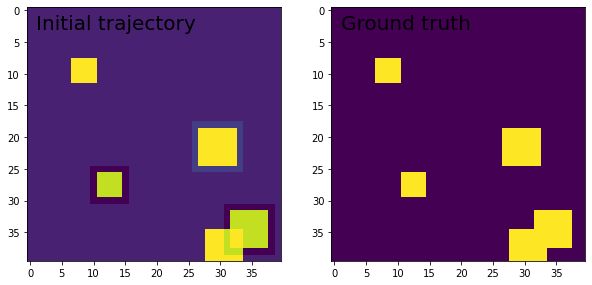

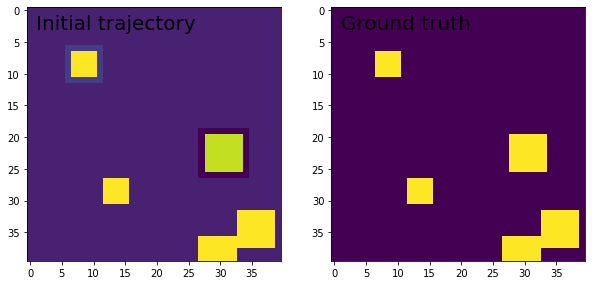

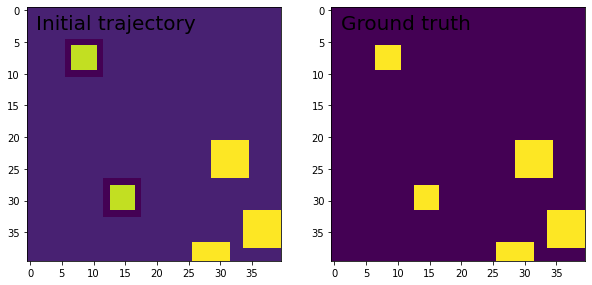

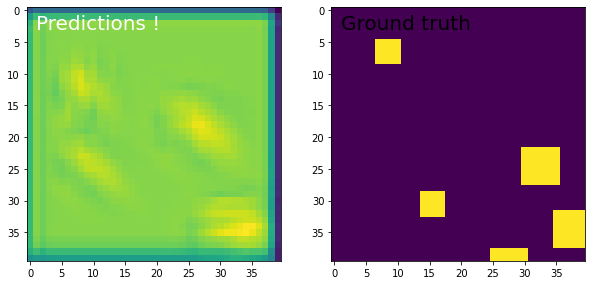

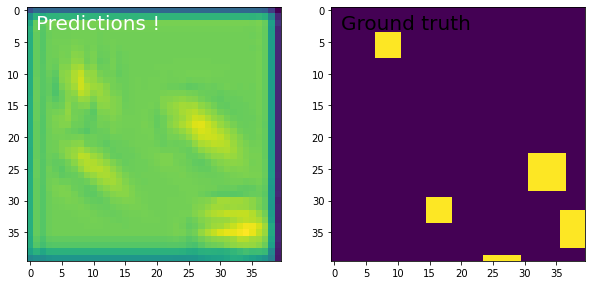

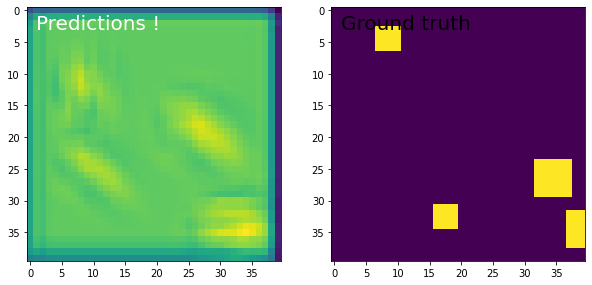

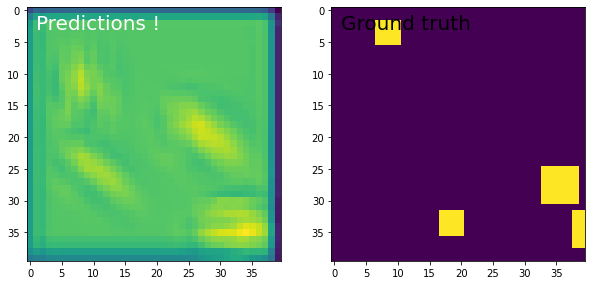

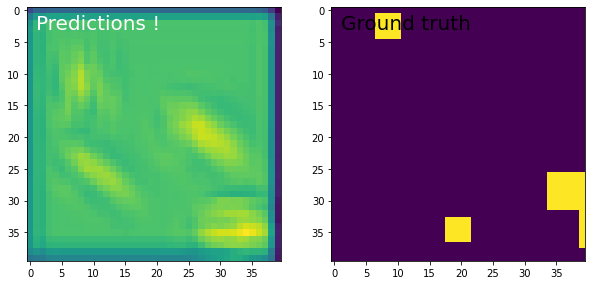

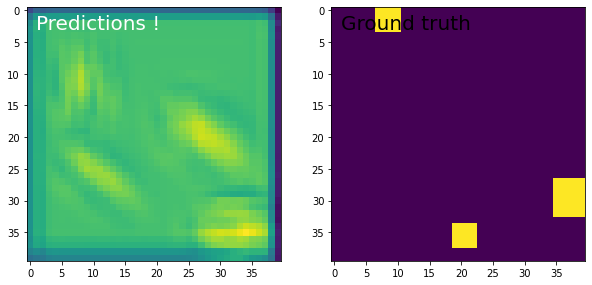

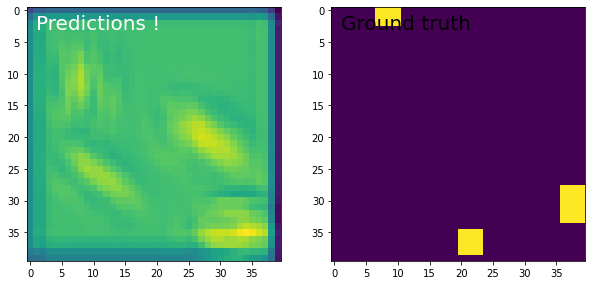

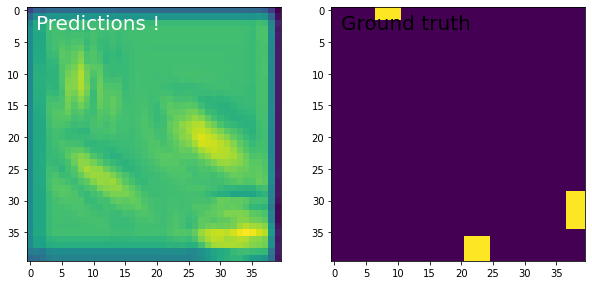

In [19]:
# 人工データの生成：3〜7個の移動する正方形を内部に持つムービーを生成します。
# 正方形は1x1または2x2ピクセルの形状で、時間の経過とともに直線的に移動します。
# 便宜上、最初に幅と高さを大きくしたムービーを作成します（80x80）
# 最後に、40x40のウィンドウを選択します。

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1
                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=1, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

In [20]:
print('SimpleRNNのスコア:', srnn_score)
print('SimpleRNNのacc', srnn_acc)
print("----------------")
print('GRUのスコア:', gru_score)
print('GRUのacc', gru_acc)
print("----------------")
print('LSTMのスコア:', lstm_score)
print('LSTMのacc:', lstm_acc)

SimpleRNNのスコア: 0.6188861131668091
SimpleRNNのacc 0.6421999931335449
----------------
GRUのスコア: 0.3878153860569
GRUのacc 0.8405600190162659
----------------
LSTMのスコア: 0.4195360243320465
LSTMのacc: 0.8338800072669983


## 【問題2】（アドバンス課題）複数のデータセット間での比較

## 【問題3】他のクラスの説明

ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN

    - ニューラルネットワークを拡張して、時系列データを扱えるようにしたクラス

- SimpleRNNCell

  - SimpleRNNのCellクラス

  - 一度に一つの時系列データのみを処理する

  - 得られる隠れ層は一つだけ


- GRUCell
    - 再帰的なユニットであるgru layerのCellクラス

- LSTMCell
    - オブジェクトである
    - 1つのステップの計算ロジックを含むLSTMレイヤーで使用。

- StackedRNNCells
    - RNNセルスタックの動作を単一セルのように見せるためのラッパーです。

- CuDNNGRU
    - CuDNNを使った高速GRUの実装です

- CuDNNLSTM
    - CuDNNを用いた高速なLSTM実装です。